Name: Rishika Mishra

PRN: 1032210945

Batch: A2

CV EXPERIMENT 4

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

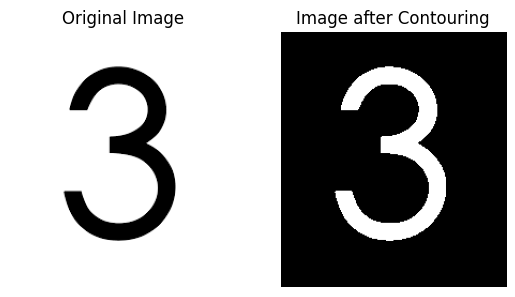

Chain Code: [0, 0, 6, 6, 1, 3, 3, 5, 0, 0, 4, 4, 6, 6, 0, 0, 0, 5, 5, 3, 3, 3, 3, 1, 1, 1, 0, 2, 0, 0]


In [5]:
# Load the image as a grayscale image
image = cv2.imread('D:/3.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to obtain a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find the contours of the digit
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there's only one contour, you can choose the appropriate one based on your image
contour = max(contours, key=cv2.contourArea)

# Sample points along the contour
sampling_step = 10
sampled_points = contour[::sampling_step]

# Initialize the chain code
chain_code = []

# Start from the top-left pixel of the digit
x, y = sampled_points[0][0]

# Define a function that returns the chain code label for the next pixel in the boundary
def next_pixel(pixel, width, height):
    """Return the chain code label for the next pixel in the boundary."""
    x, y = pixel
    labels = [
        (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)
    ]
    for label, (dx, dy) in enumerate(labels):
        nx, ny = x + dx, y + dy
        if 0 <= nx < width and 0 <= ny < height and binary_image[ny, nx] == 0:
            return label
    return -1

# Iterate over the sampled points
for i in range(1, len(sampled_points)):
    label = next_pixel((x, y), image.shape[1], image.shape[0])
    if label != -1:
        chain_code.append(label)
    x, y = sampled_points[i][0]

# Display the original image, the image after contouring, sampled points, and print the chain code
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Image after Contouring')
plt.axis('off')

plt.show()

print("Chain Code:", chain_code)


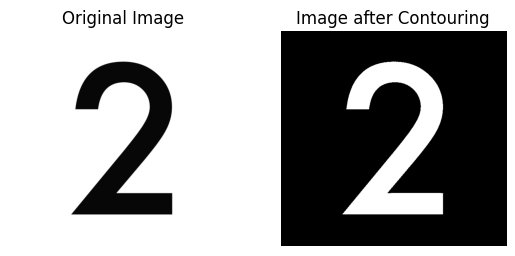

Chain Code: [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 1, 1, 1, 1, 3, 3, 3, 3, 3, 5, 5, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [7]:
# Load the image as a grayscale image
image = cv2.imread('D:/2.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image to obtain a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find the contours of the digit
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming there's only one contour, you can choose the appropriate one based on your image
contour = max(contours, key=cv2.contourArea)

# Sample points along the contour
sampling_step = 10
sampled_points = contour[::sampling_step]

# Initialize the chain code
chain_code = []

# Start from the top-left pixel of the digit
x, y = sampled_points[0][0]

# Define a function that returns the chain code label for the next pixel in the boundary
def next_pixel(pixel, width, height):
    """Return the chain code label for the next pixel in the boundary."""
    x, y = pixel
    labels = [
        (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)
    ]
    for label, (dx, dy) in enumerate(labels):
        nx, ny = x + dx, y + dy
        if 0 <= nx < width and 0 <= ny < height and binary_image[ny, nx] == 0:
            return label
    return -1

# Iterate over the sampled points
for i in range(1, len(sampled_points)):
    label = next_pixel((x, y), image.shape[1], image.shape[0])
    if label != -1:
        chain_code.append(label)
    x, y = sampled_points[i][0]

# Display the original image, the image after contouring, sampled points, and print the chain code
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Image after Contouring')
plt.axis('off')

plt.show()

print("Chain Code:", chain_code)


In [8]:
def generate_chain_code(image_path, sampling_step=10):
    # Load the image as a grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to obtain a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Find the contours of the digit
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there's only one contour, you can choose the appropriate one based on your image
    contour = max(contours, key=cv2.contourArea)

    # Sample points along the contour
    sampled_points = contour[::sampling_step]

    # Initialize the chain code
    chain_code = []

    # Start from the top-left pixel of the digit
    x, y = sampled_points[0][0]

    # Define a function that returns the chain code label for the next pixel in the boundary
    def next_pixel(pixel, width, height):
        x, y = pixel
        labels = [
            (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)
        ]
        for label, (dx, dy) in enumerate(labels):
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and binary_image[ny, nx] == 0:
                return label
        return -1

    # Iterate over the sampled points
    for i in range(1, len(sampled_points)):
        label = next_pixel((x, y), image.shape[1], image.shape[0])
        if label != -1:
            chain_code.append(label)
        x, y = sampled_points[i][0]

    return chain_code

chain_code_1 = generate_chain_code('D:/3.png')
print("Chain Code - Image 1:", chain_code_1)

# Process another image
chain_code_2 = generate_chain_code('D:/3.png')
print("\nChain Code - Image 2:", chain_code_2)

# Compare chain codes to check if shapes are similar
if chain_code_1 == chain_code_2:
    print("Shapes are similar.")
else:
    print("Shapes are different.")


# Display the difference between chain codes
difference_code = [abs(a - b) for a, b in zip(chain_code_1, chain_code_2)]


# Display the difference code
print("\nDifference:", difference_code)


Chain Code - Image 1: [0, 0, 6, 6, 1, 3, 3, 5, 0, 0, 4, 4, 6, 6, 0, 0, 0, 5, 5, 3, 3, 3, 3, 1, 1, 1, 0, 2, 0, 0]

Chain Code - Image 2: [0, 0, 6, 6, 1, 3, 3, 5, 0, 0, 4, 4, 6, 6, 0, 0, 0, 5, 5, 3, 3, 3, 3, 1, 1, 1, 0, 2, 0, 0]
Shapes are similar.

Difference: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
def generate_chain_code(image_path, sampling_step=10):
    # Load the image as a grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to obtain a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Find the contours of the digit
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming there's only one contour, you can choose the appropriate one based on your image
    contour = max(contours, key=cv2.contourArea)

    # Sample points along the contour
    sampled_points = contour[::sampling_step]

    # Initialize the chain code
    chain_code = []

    # Start from the top-left pixel of the digit
    x, y = sampled_points[0][0]

    # Define a function that returns the chain code label for the next pixel in the boundary
    def next_pixel(pixel, width, height):
        x, y = pixel
        labels = [
            (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)
        ]
        for label, (dx, dy) in enumerate(labels):
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and binary_image[ny, nx] == 0:
                return label
        return -1

    # Iterate over the sampled points
    for i in range(1, len(sampled_points)):
        label = next_pixel((x, y), image.shape[1], image.shape[0])
        if label != -1:
            chain_code.append(label)
        x, y = sampled_points[i][0]

    return chain_code

chain_code_1 = generate_chain_code('D:/3.png')
print("Chain Code - Image 1:", chain_code_1)

# Process another image
chain_code_2 = generate_chain_code('D:/2.jpg')
print("\nChain Code - Image 2:", chain_code_2)

# Compare chain codes to check if shapes are similar
if chain_code_1 == chain_code_2:
    print("Shapes are similar.")
else:
    print("Shapes are different.")


# Display the difference between chain codes
difference_code = [abs(a - b) for a, b in zip(chain_code_1, chain_code_2)]


# Display the difference code
print("\nDifference:", difference_code)


Chain Code - Image 1: [0, 0, 6, 6, 1, 3, 3, 5, 0, 0, 4, 4, 6, 6, 0, 0, 0, 5, 5, 3, 3, 3, 3, 1, 1, 1, 0, 2, 0, 0]

Chain Code - Image 2: [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 1, 1, 1, 1, 3, 3, 3, 3, 3, 5, 5, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Shapes are different.

Difference: [0, 0, 6, 6, 1, 3, 3, 1, 6, 6, 3, 3, 5, 5, 3, 3, 3, 2, 2, 2, 2, 3, 3, 5, 5, 5, 6, 4, 6, 6]
